In [2]:
import pandas as pd

# Memuat data dari file CSV
file_path = '/content/Rekrutmen data - recruitment_data.csv'
recruitment_data = pd.read_csv('//content/Rekrutmen data - recruitment_data.csv')

# Menampilkan beberapa baris pertama untuk memverifikasi data
recruitment_data.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [3]:
# Cek missing data
missing_data = recruitment_data.isnull().sum()

# Mengisi missing data dengan mean
recruitment_data['InterviewScore'].fillna(recruitment_data['InterviewScore'].mean(), inplace=True)


<ipython-input-3-331837ff5612>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  recruitment_data['InterviewScore'].fillna(recruitment_data['InterviewScore'].mean(), inplace=True)


In [4]:
# Memeriksa tipe data kolom
data_types = recruitment_data.dtypes


In [5]:
from sklearn.preprocessing import StandardScaler

# Standarisasi kolom numerik
scaler = StandardScaler()
columns_to_scale = ['Age', 'ExperienceYears', 'InterviewScore', 'SkillScore', 'PersonalityScore', 'DistanceFromCompany']
recruitment_data[columns_to_scale] = scaler.fit_transform(recruitment_data[columns_to_scale])


In [6]:
# Mengecek apakah ada missing values di dataset setelah pembersihan
missing_values = recruitment_data.isnull().sum()
print(missing_values)

Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64


In [7]:
# Mengecek apakah ada duplikat dalam dataset
duplicate_rows = recruitment_data.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_rows}")

Jumlah baris duplikat: 0


In [8]:
# Mengecek mean dan standar deviasi dari fitur numerik setelah standarisasi
columns_to_scale = ['Age', 'ExperienceYears', 'InterviewScore', 'SkillScore', 'PersonalityScore', 'DistanceFromCompany']
scaled_features_summary = recruitment_data[columns_to_scale].describe()

# Menampilkan hasil ringkasan statistik untuk memeriksa apakah sudah terstandarisasi
print(scaled_features_summary)

                Age  ExperienceYears  InterviewScore    SkillScore  \
count  1.500000e+03     1.500000e+03    1.500000e+03  1.500000e+03   
mean   3.315866e-16     1.421085e-17   -9.473903e-18  1.184238e-17   
std    1.000334e+00     1.000334e+00    1.000334e+00  1.000334e+00   
min   -1.637757e+00    -1.658237e+00   -1.766942e+00 -1.741971e+00   
25%   -8.809709e-01    -7.961435e-01   -8.933254e-01 -8.644422e-01   
50%   -1.607269e-02     6.595017e-02    5.018054e-02  6.420442e-02   
75%    8.488255e-01     9.280439e-01    8.539078e-01  8.480163e-01   
max    1.605611e+00     1.574614e+00    1.727524e+00  1.665907e+00   

       PersonalityScore  DistanceFromCompany  
count      1.500000e+03         1.500000e+03  
mean       9.118632e-17         1.965835e-16  
std        1.000334e+00         1.000334e+00  
min       -1.683081e+00        -1.680642e+00  
25%       -8.992591e-01        -8.698168e-01  
50%       -1.320001e-02        -2.156070e-04  
75%        9.069383e-01         8.400199

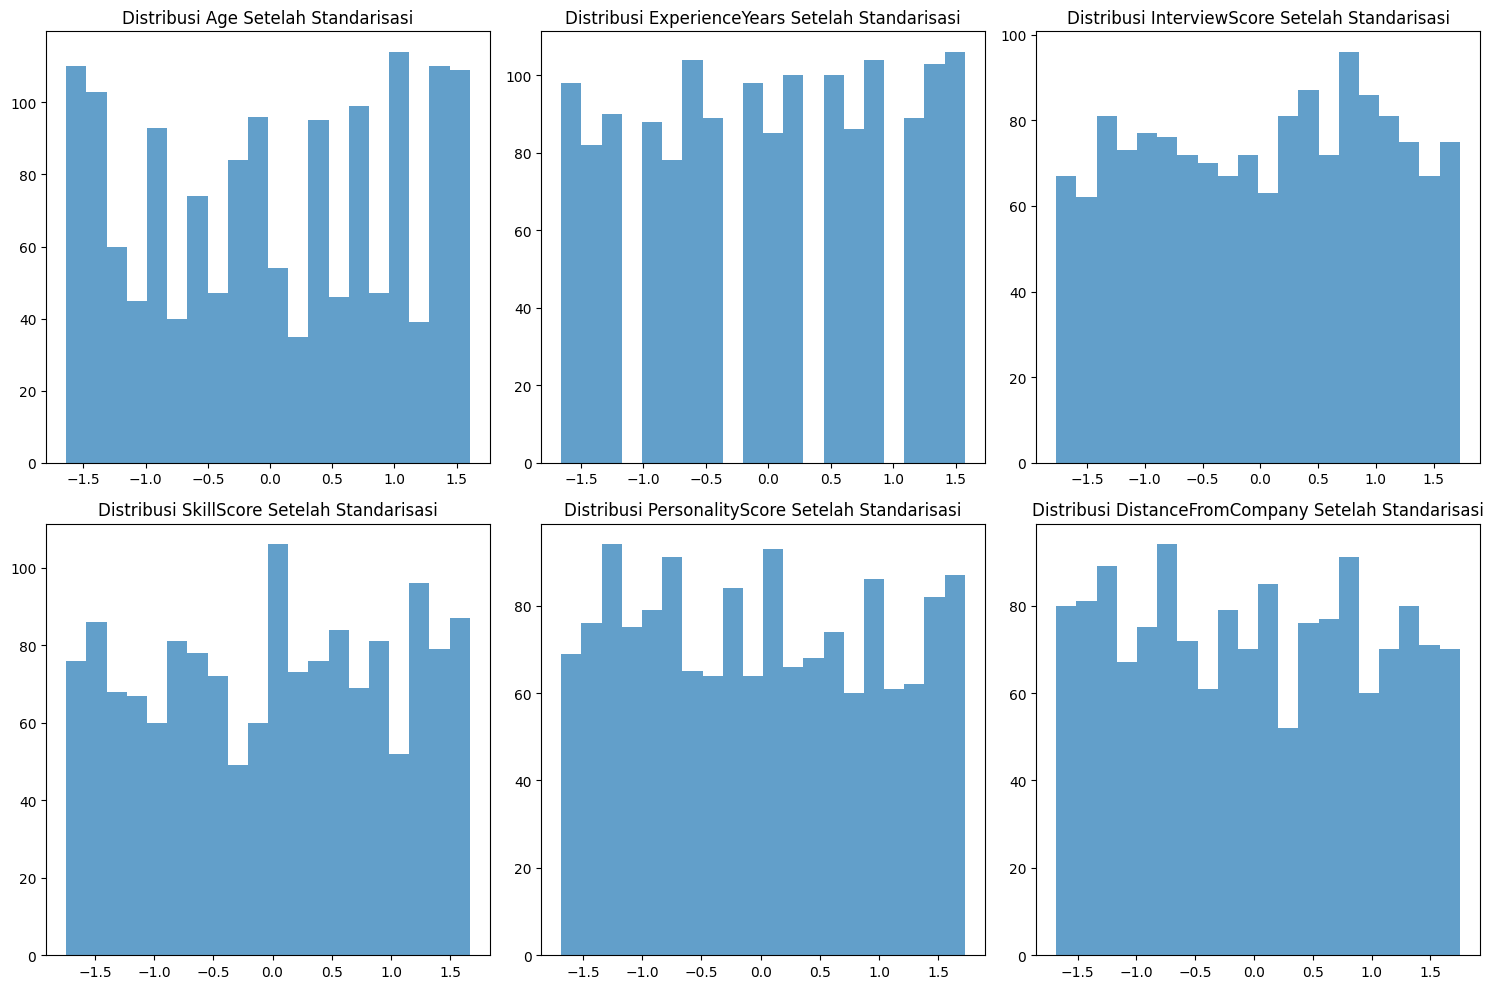

In [9]:
# Visualisasi distribusi fitur numerik setelah standarisasi
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i, feature in enumerate(columns_to_scale, 1):
    plt.subplot(2, 3, i)
    plt.hist(recruitment_data[feature], bins=20, alpha=0.7)
    plt.title(f'Distribusi {feature} Setelah Standarisasi')

plt.tight_layout()
plt.show()

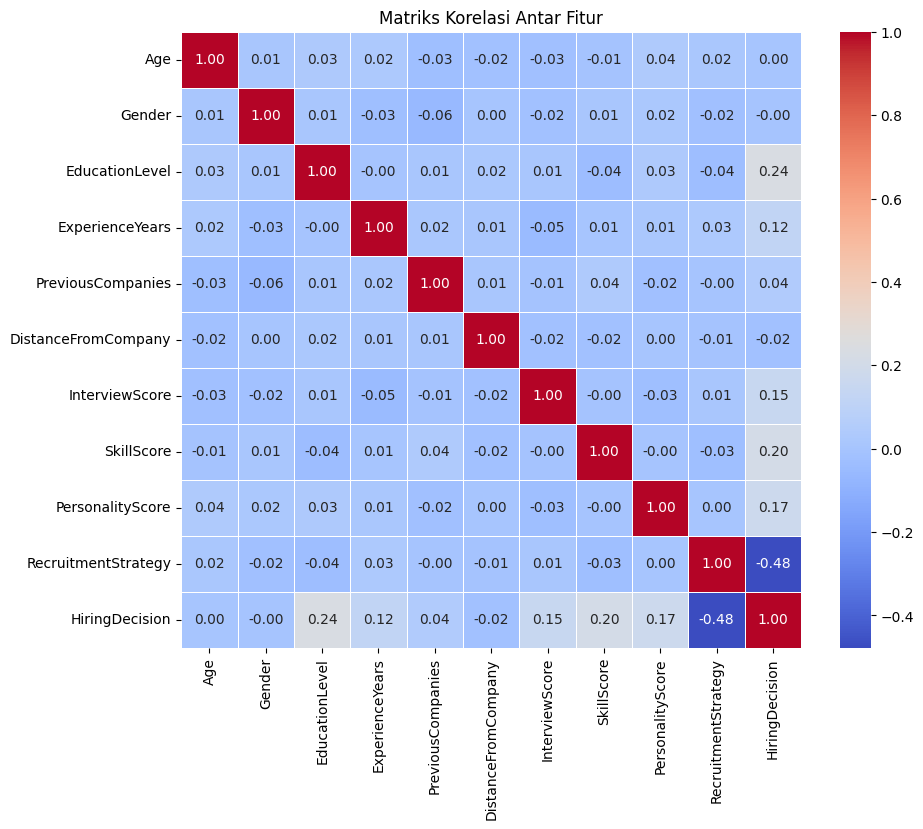

In [10]:
# Matriks korelasi antar fitur
correlation_matrix = recruitment_data.corr()

# Visualisasi matriks korelasi
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Antar Fitur")
plt.show()

In [11]:
# Cek z-score untuk mendeteksi outliers
from scipy.stats import zscore

z_scores = zscore(recruitment_data[columns_to_scale])
outliers = (abs(z_scores) > 3).sum()  # Misalnya, z-score > 3 dianggap outlier
print(f"Jumlah outliers: {outliers}")

Jumlah outliers: 0


Distribusi Data

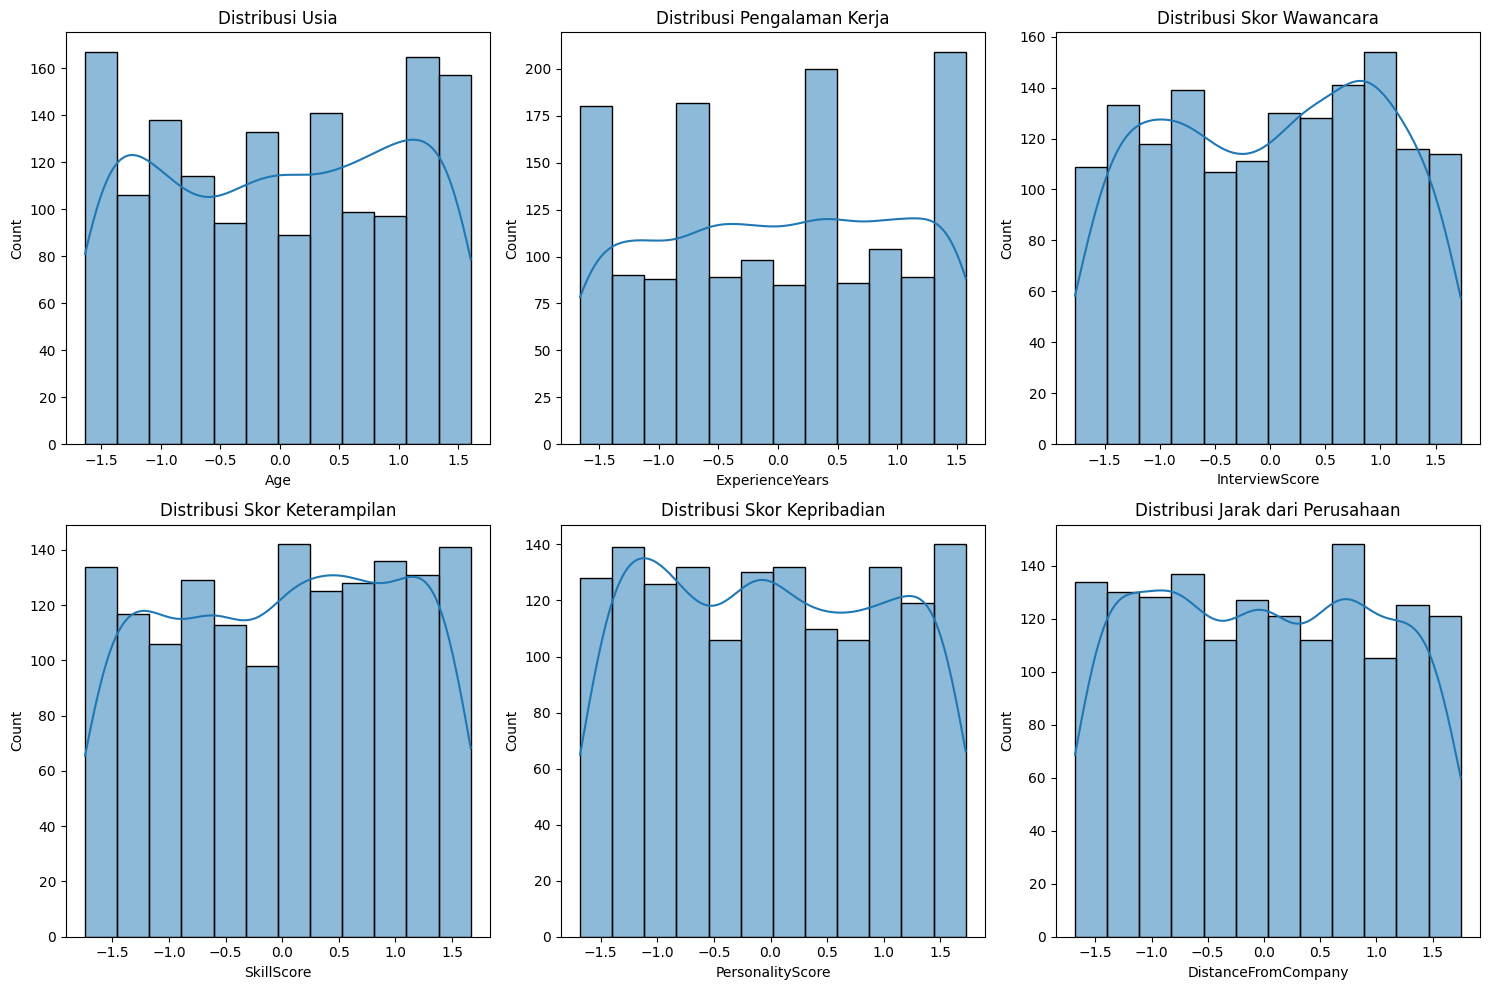

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Plot distribusi beberapa variabel
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(recruitment_data['Age'], kde=True, ax=axes[0, 0]).set_title('Distribusi Usia')
sns.histplot(recruitment_data['ExperienceYears'], kde=True, ax=axes[0, 1]).set_title('Distribusi Pengalaman Kerja')
sns.histplot(recruitment_data['InterviewScore'], kde=True, ax=axes[0, 2]).set_title('Distribusi Skor Wawancara')
sns.histplot(recruitment_data['SkillScore'], kde=True, ax=axes[1, 0]).set_title('Distribusi Skor Keterampilan')
sns.histplot(recruitment_data['PersonalityScore'], kde=True, ax=axes[1, 1]).set_title('Distribusi Skor Kepribadian')
sns.histplot(recruitment_data['DistanceFromCompany'], kde=True, ax=axes[1, 2]).set_title('Distribusi Jarak dari Perusahaan')

plt.tight_layout()
plt.show()


•  Distribusi Usia (Age):
Sebagian besar kandidat berusia antara 25 hingga 30 tahun, yang menunjukkan adanya ketertarikan pada kandidat yang relatif muda.

•  Distribusi Pengalaman Kerja (ExperienceYears):
Sebagian besar kandidat memiliki pengalaman kerja rendah, yang menunjukkan bahwa perusahaan lebih banyak merekrut kandidat dengan pengalaman yang lebih sedikit atau yang lebih muda.

•  Distribusi Skor Wawancara (InterviewScore):
Sebagian besar kandidat mendapatkan nilai tinggi, tetapi ada juga beberapa yang memiliki skor rendah.

•  Distribusi Skor Keterampilan (SkillScore):
Banyak kandidat yang memiliki skor tinggi.

•  Distribusi Skor Kepribadian (PersonalityScore):
Ada variasi yang cukup besar dalam penilaian kepribadian menunjukkan bahwa perusahaan mungkin memiliki berbagai kriteria dalam menilai kepribadian kandidat.

•  Distribusi Jarak dari Perusahaan (DistanceFromCompany):
Sebagian besar kandidat tinggal dekat dengan perusahaan eskipun ada juga yang tinggal jauh (to be discussed apakah mempengaruhi keputusan perekrutan)


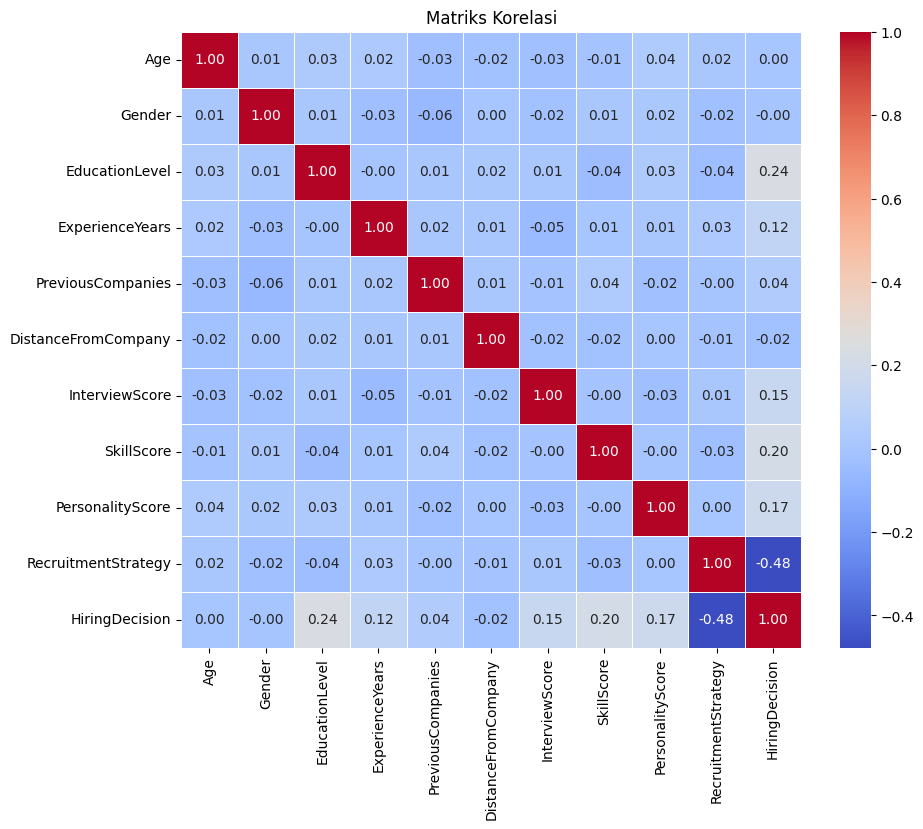

In [13]:
# Matriks korelasi antar fitur
correlation_matrix = recruitment_data.corr()
# Visualisasi korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()


RecruitmentStrategy memiliki korelasi negatif dengan HiringDecision, menunjukkan bahwa strategi perekrutan tertentu mungkin lebih sering menghasilkan
penerimaan atau penolakan daripada yang lain. Ini bisa menunjukkan bahwa metode perekrutan berperan besar dalam proses seleksi.

In [18]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi fitur dan target
X = recruitment_data.drop('HiringDecision', axis=1)
y = recruitment_data['HiringDecision']

# Pembagian data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Smote
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_test, y_test = smote.fit_resample(X_train, y_train)


# Normalize the features for performance scoring
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
performance_scores = X_normalized.mean().values


Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Membuat model Logistic Regression
model = LogisticRegression()

# Melatih model dengan data training
model.fit(X_train, y_train)

# Prediksi dengan data testing
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Akurasi: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Akurasi: 0.8304878048780487
Precision: 0.900887573964497
Recall: 0.7426829268292683
F1 Score: 0.8141711229946524


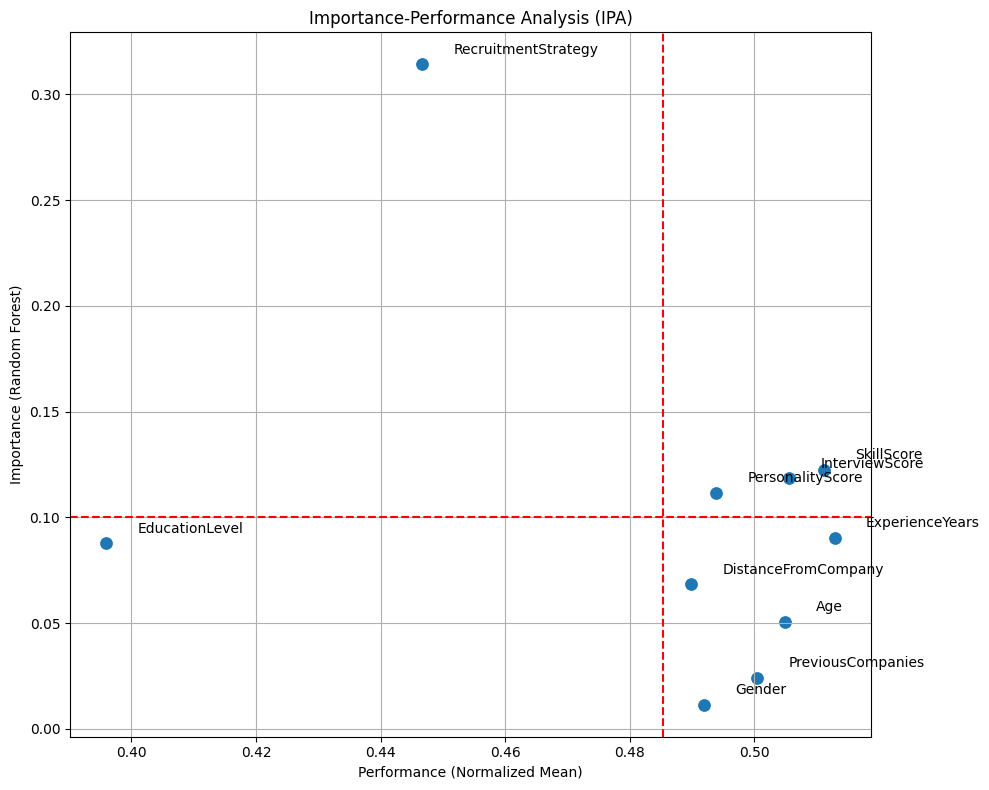

,Feature,Importance,Performance
9,RecruitmentStrategy,0.314118,0.446667
7,SkillScore,0.122446,0.511160
6,InterviewScore,0.118572,0.505640
8,PersonalityScore,0.111728,0.493873
3,ExperienceYears,0.090480,0.512933
2,EducationLevel,0.087822,0.396000
5,DistanceFromCompany,0.068440,0.489861
0,Age,0.050617,0.504956
4,PreviousCompanies,0.024304,0.500500
1,Gender,0.011473,0.492000


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Fit a Random Forest to get feature importances
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
importances = model.feature_importances_

# Normalize the features for performance scoring
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
performance_scores = X_normalized.mean().values

# Create a dataframe for IPA
ipa_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances,
    "Performance": performance_scores
})

# IPA Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=ipa_df, x="Performance", y="Importance", s=100)

# Add quadrant lines
plt.axhline(ipa_df["Importance"].mean(), color='red', linestyle='--')
plt.axvline(ipa_df["Performance"].mean(), color='red', linestyle='--')

# Annotate points
for i in range(len(ipa_df)):
    plt.text(ipa_df["Performance"][i]+0.005, ipa_df["Importance"][i]+0.005, ipa_df["Feature"][i])

plt.title("Importance-Performance Analysis (IPA)")
plt.xlabel("Performance (Normalized Mean)")
plt.ylabel("Importance (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()

ipa_df.sort_values(by="Importance", ascending=False)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Inisialisasi model baseline
baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)

# Prediksi
y_pred = baseline_model.predict(X_test)

# Evaluasi
print("=== Baseline Model (Logistic Regression) ===")
print(classification_report(y_test, y_pred))

=== Baseline Model (Logistic Regression) ===
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       820
           1       0.90      0.74      0.81       820

    accuracy                           0.83      1640
   macro avg       0.84      0.83      0.83      1640
weighted avg       0.84      0.83      0.83      1640



In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Inisialisasi model
models = {
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC()
}

# Simpan hasil evaluasi
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

# Tampilkan hasil dalam bentuk DataFrame
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='F1 Score', ascending=False))

           Model  Accuracy  Precision    Recall  F1 Score
3  Random Forest  0.982317   1.000000  0.964634  0.981999
2  Decision Tree  0.975610   1.000000  0.951220  0.975000
4            SVM  0.861585   0.943199  0.769512  0.847549
0            KNN  0.849390   0.955485  0.732927  0.829538
1    Naive Bayes  0.842683   0.932308  0.739024  0.824490


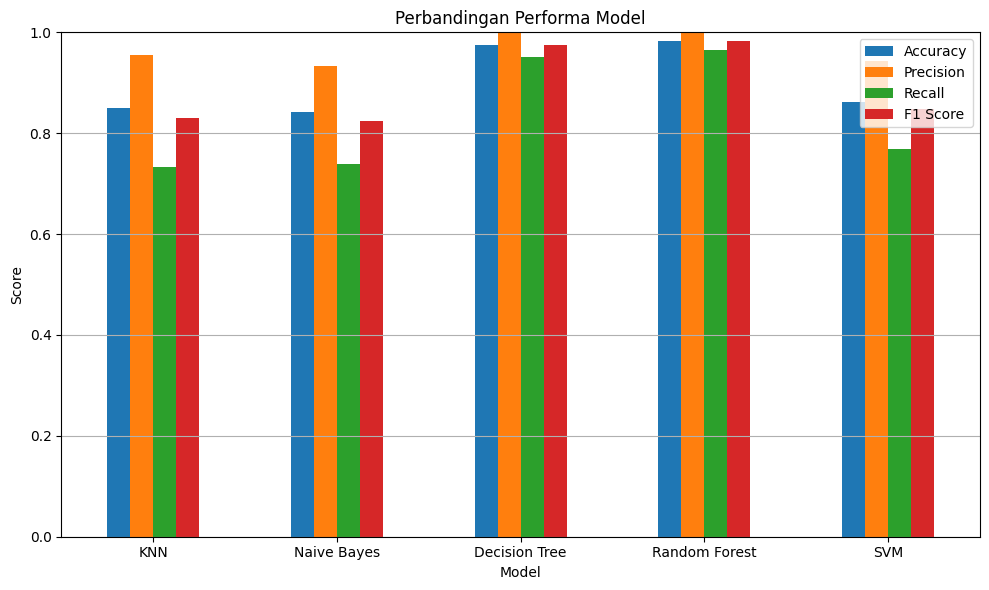

In [23]:
import matplotlib.pyplot as plt

results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(
    kind='bar', figsize=(10,6), ylim=(0,1), title='Perbandingan Performa Model')
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


=== KNN ===
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.87       820
           1       0.96      0.73      0.83       820

    accuracy                           0.85      1640
   macro avg       0.87      0.85      0.85      1640
weighted avg       0.87      0.85      0.85      1640



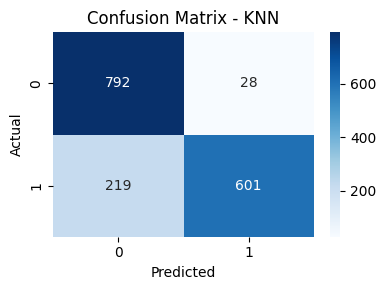


=== Naive Bayes ===
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       820
           1       0.93      0.74      0.82       820

    accuracy                           0.84      1640
   macro avg       0.86      0.84      0.84      1640
weighted avg       0.86      0.84      0.84      1640



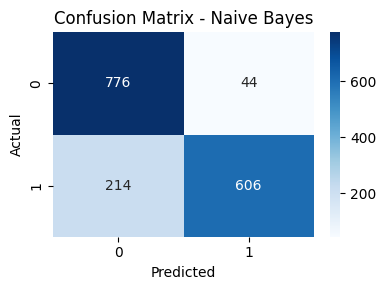


=== Decision Tree ===
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       820
           1       1.00      0.95      0.97       820

    accuracy                           0.98      1640
   macro avg       0.98      0.98      0.98      1640
weighted avg       0.98      0.98      0.98      1640



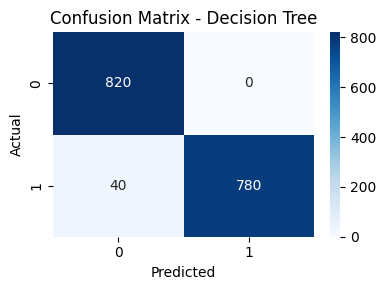


=== Random Forest ===
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       820
           1       1.00      0.96      0.98       820

    accuracy                           0.98      1640
   macro avg       0.98      0.98      0.98      1640
weighted avg       0.98      0.98      0.98      1640



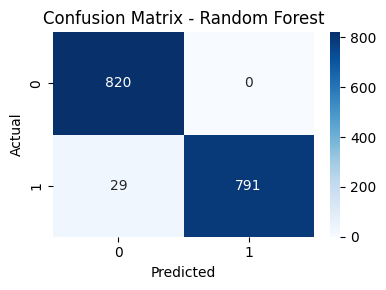


=== SVM ===
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       820
           1       0.94      0.77      0.85       820

    accuracy                           0.86      1640
   macro avg       0.87      0.86      0.86      1640
weighted avg       0.87      0.86      0.86      1640



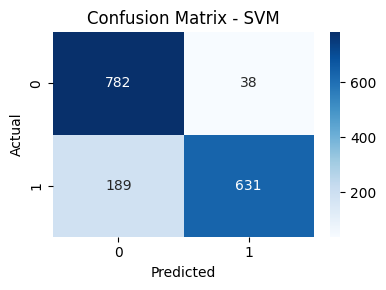

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

for name, model in models.items():
    y_pred = model.predict(X_test)

    print(f"\n=== {name} ===")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

In [25]:
predictions = pd.DataFrame({'Actual': y_test})

for name, model in models.items():
    predictions[name] = model.predict(X_test)

print(predictions.head())

   Actual  KNN  Naive Bayes  Decision Tree  Random Forest  SVM
0       0    0            0              0              0    0
1       0    0            0              0              0    0
2       0    0            1              0              0    1
3       1    0            0              1              1    0
4       0    0            0              0              0    0


In [26]:
(predictions['SVM'] != predictions['Random Forest']).sum()

np.int64(210)

In [27]:
predictions['SVM_Correct'] = predictions['SVM'] == predictions['Actual']
predictions['RF_Correct'] = predictions['Random Forest'] == predictions['Actual']

print(predictions[['Actual', 'SVM', 'SVM_Correct', 'Random Forest', 'RF_Correct']].head())

   Actual  SVM  SVM_Correct  Random Forest  RF_Correct
0       0    0         True              0        True
1       0    0         True              0        True
2       0    1        False              0        True
3       1    0        False              1        True
4       0    0         True              0        True


Hypertuning

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import numpy as np

# Make sure X_train and y_train are already defined in your environment.

# ----------------------------
# 1. Random Forest Parameters
# ----------------------------
param_dist_rf = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
search_rf = RandomizedSearchCV(
    rf,
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=5,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)
search_rf.fit(X_train, y_train)

# ----------------------------
# 2. SVM Parameters
# ----------------------------
param_dist_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svc = SVC()
search_svc = RandomizedSearchCV(
    svc,
    param_distributions=param_dist_svc,
    n_iter=10,
    cv=5,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)
search_svc.fit(X_train, y_train)

# ----------------------------
# 3. KNN Parameters
# ----------------------------
param_dist_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()
search_knn = RandomizedSearchCV(
    knn,
    param_distributions=param_dist_knn,
    n_iter=10,
    cv=5,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)
search_knn.fit(X_train, y_train)

# ----------------------------
# Display Best Results
# ----------------------------
print("Best Random Forest Parameters:")
print(search_rf.best_params_)
print("Best Random Forest F1 Score:", search_rf.best_score_)

print("\nBest SVM Parameters:")
print(search_svc.best_params_)
print("Best SVM F1 Score:", search_svc.best_score_)

print("\nBest KNN Parameters:")
print(search_knn.best_params_)
print("Best KNN F1 Score:", search_knn.best_score_)

Best Random Forest Parameters:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Best Random Forest F1 Score: 0.8676064825949836

Best SVM Parameters:
{'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
Best SVM F1 Score: 0.7667524667524668

Best KNN Parameters:
{'weights': 'uniform', 'p': 1, 'n_neighbors': 7}
Best KNN F1 Score: 0.6635367985556332
